<a href="https://colab.research.google.com/github/abhijith789/British-airways-virtual-internship/blob/main/British_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# **1. Understanding the data**

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
# Convert flight_duration column datatype into int

df['flight_duration'] = df['flight_duration'].astype(int)

In [ ]:
df['flight_duration']

,flight_duration
0,5
1,5
2,5
3,5
4,5
...,...
49995,5
49996,5
49997,5
49998,5


In [ ]:
for col in df.columns:
  numerical_features = ['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','flight_duration']
  if col not in numerical_features:
    print(col,df[col].unique())
    print('-'* 50)

sales_channel ['Internet' 'Mobile']
--------------------------------------------------
trip_type ['RoundTrip' 'CircleTrip' 'OneWay']
--------------------------------------------------
route ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPE

**Found missing values in column 'booking_origin'**

In [ ]:
import numpy as np
# Replace the value '(not set) with nan
df['booking_origin'] = df['booking_origin'].replace('(not set)', np.nan)
# Impute with mode
df['booking_origin'].fillna(df['booking_origin'].mode()[0], inplace=True)

<ipython-input-17-1e4e21a18db6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['booking_origin'].fillna(df['booking_origin'].mode()[0], inplace=True)


In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', 'Australia', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Cambodia', 'Poland', 'Belgium', 'Oman', 'Bangladesh',
       'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan', 'Brunei',
       'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia', 'Iran',
       'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius', 'Nepal',
       'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria', 'Lebanon',
       'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania', 'Peru',
       'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (Burma)', 'Nor

In [ ]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
# Checking the distribution of target column 'booking_complete'
df['booking_complete'].value_counts()

,count
booking_complete,
0,42522
1,7478


**Found imbalance in the distribution**

# **2. Exploratory Data Analysis (EDA)**

**Convert booking_origin column which contain countries into continents**

In [ ]:
!pip install pycountry-convert==0.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.8/239.8 kB 17.4 MB/s eta 0:00:00


In [65]:
import pycountry_convert as pc

def country_to_continent(country_name):
    """Converts country name to continent code."""
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return country_continent_code
    except KeyError:
        return "Unknown"

In [67]:
df['continent_code'] = df['booking_origin'].apply(country_to_continent)

In [68]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,continent_code
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5,0,OC
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5,0,OC
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5,0,AS
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5,0,OC
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5,0,AS


In [69]:
df['continent_code'].unique()

array(['OC', 'AS', 'EU', 'AF', 'NA', 'SA', 'Unknown'], dtype=object)

Continent codes:
- AS: Asia
- OC: Oceania
- EU: Europe
- NA: North America
- AF: Africa
- SA: South America
- Unkown: Other or unclassified territories

In [72]:
df.drop('booking_origin', axis=1, inplace=True)

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,6.676300,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.425187,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.000000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.000000,1.000000


# **Univariate Analysis on Numerical columns**

In [34]:
numerical_features

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'flight_duration']

In [ ]:
# Install the dependencies
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set the desired theme
sns.set_theme(style='whitegrid')

In [36]:
df['num_passengers'].unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8])

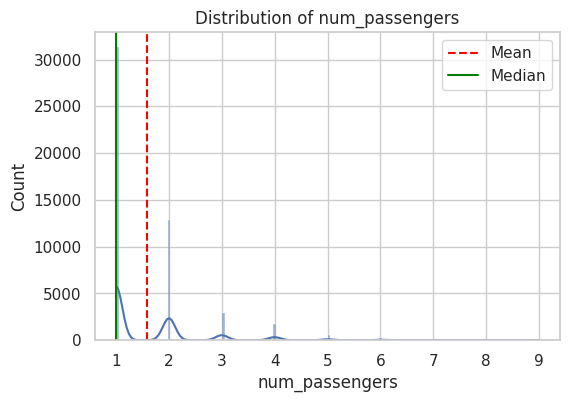

Mean : 1.59124
Median : 1.0


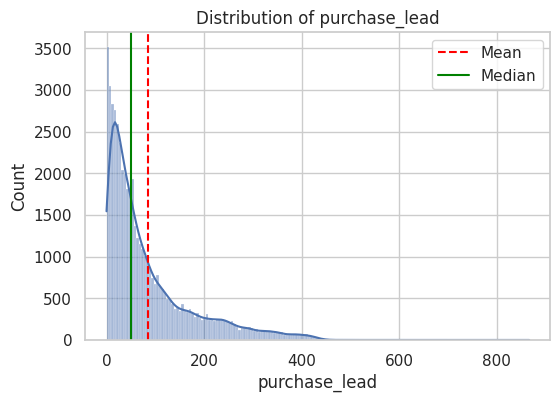

Mean : 84.94048
Median : 51.0


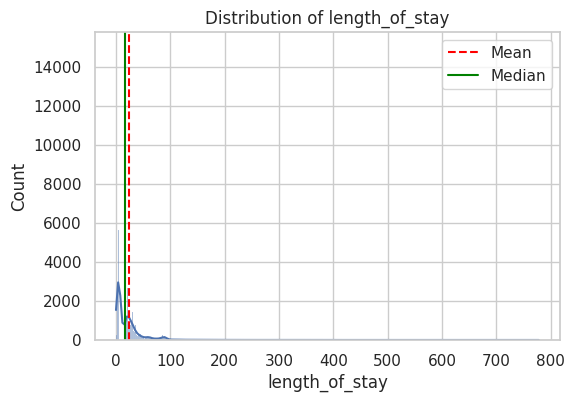

Mean : 23.04456
Median : 17.0


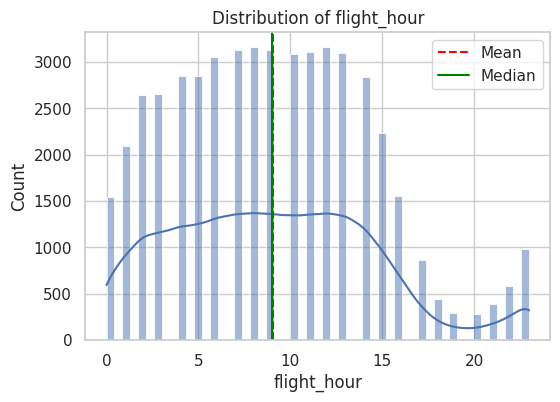

Mean : 9.06634
Median : 9.0


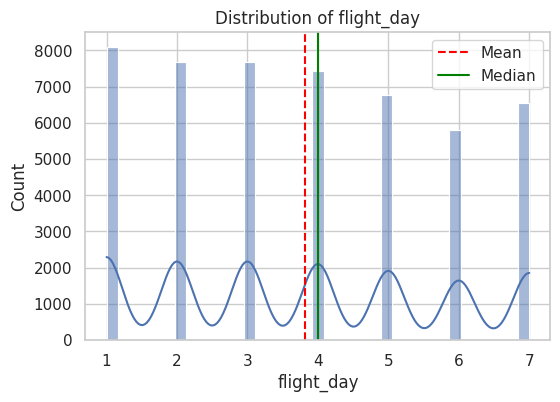

Mean : 3.81442
Median : 4.0


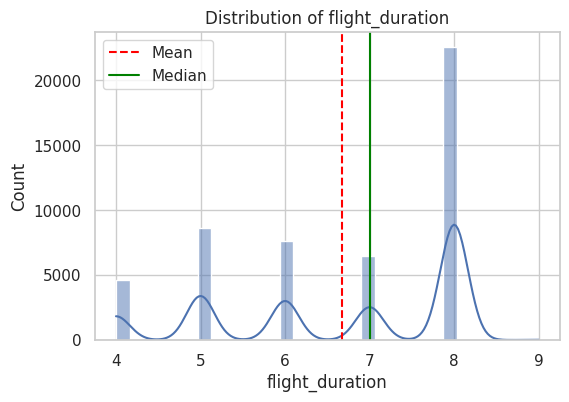

Mean : 6.6763
Median : 7.0


In [41]:
# Histogram plot for
for col in numerical_features:
  plt.figure(figsize=(6,4))
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')
  mean = df[col].mean()
  median = df[col].median()

# Adding mean and median lines

  plt.axvline(mean, color='red', linestyle='dashed',label='Mean')
  plt.axvline(median, color='green', linestyle='solid',label='Median')

  plt.legend()
  plt.show()
  print('Mean :',mean)
  print('Median :',median)

**Box plot for identifying outliers**

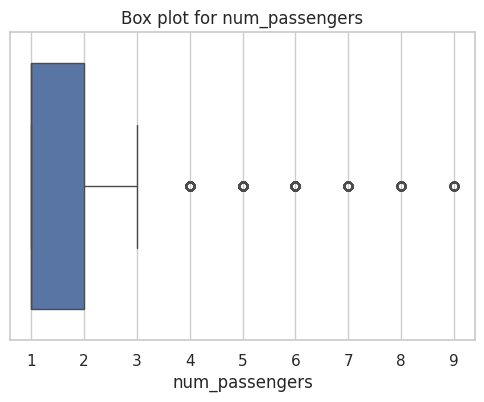

--------------------------------------------------


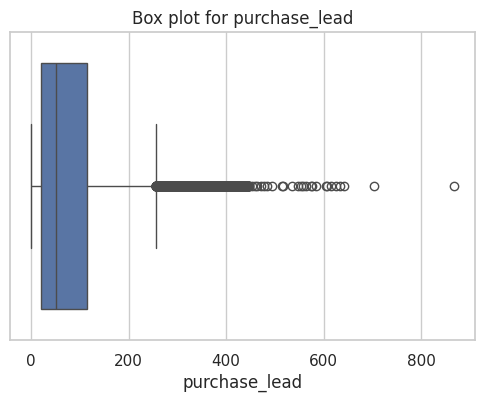

--------------------------------------------------


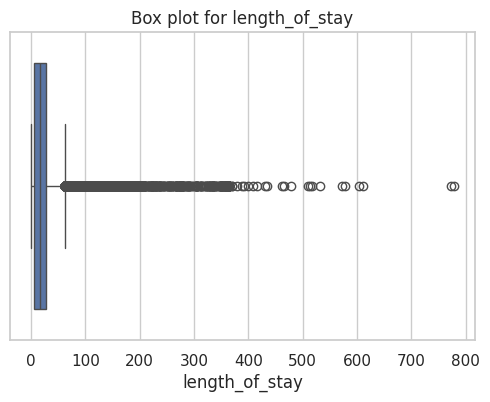

--------------------------------------------------


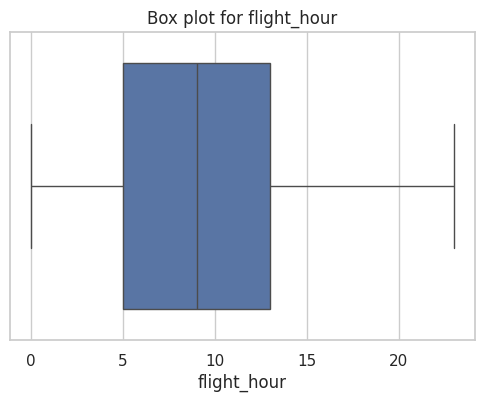

--------------------------------------------------


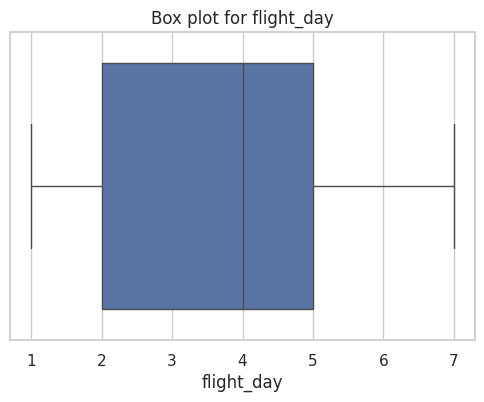

--------------------------------------------------


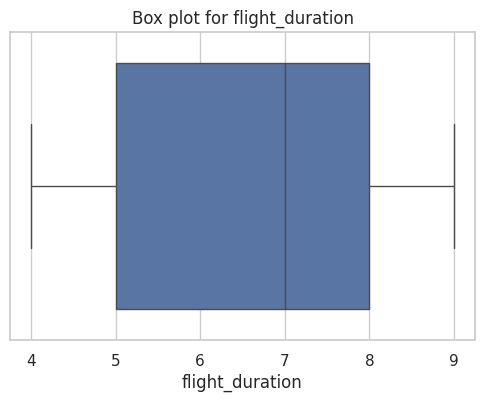

--------------------------------------------------


In [45]:
for col in numerical_features:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f'Box plot for {col}')
  plt.show()
  print('-'*50)

In [46]:
# Count the outliers using IQR method for Numerical features

for col in numerical_features:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col]< lower_bound) | (df[col] > upper_bound)]
  print(f'Number of outliers in {col} :',len(outliers))

Number of outliers in num_passengers : 2903
Number of outliers in purchase_lead : 3456
Number of outliers in length_of_stay : 3807
Number of outliers in flight_hour : 0
Number of outliers in flight_day : 0
Number of outliers in flight_duration : 0


# **Univariate Analysis for Categorical Features**

In [73]:
for col in df.columns:
  if col not in numerical_features:
    print(col)

sales_channel
trip_type
route
wants_extra_baggage
wants_preferred_seat
wants_in_flight_meals
booking_complete
continent_code


In [74]:
categorical_features = ['sales_channel','trip_type','route','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','continent_code']

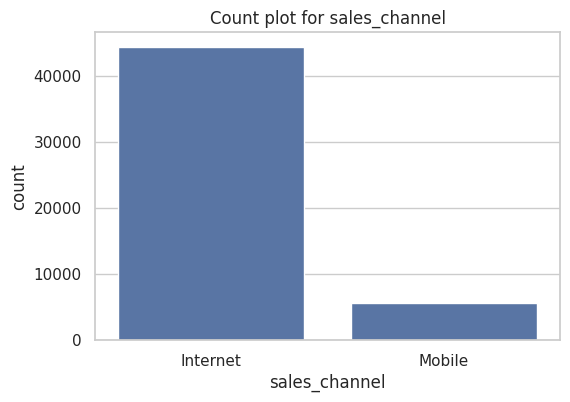

--------------------------------------------------


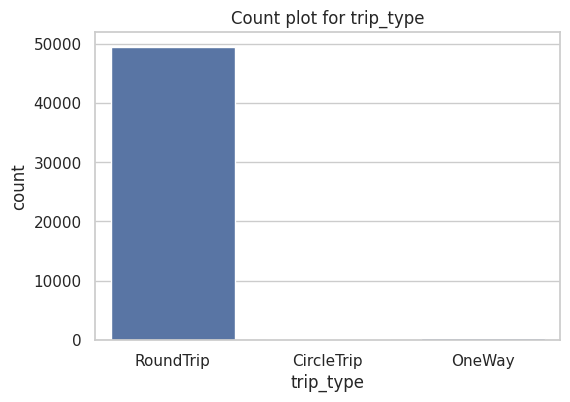

--------------------------------------------------


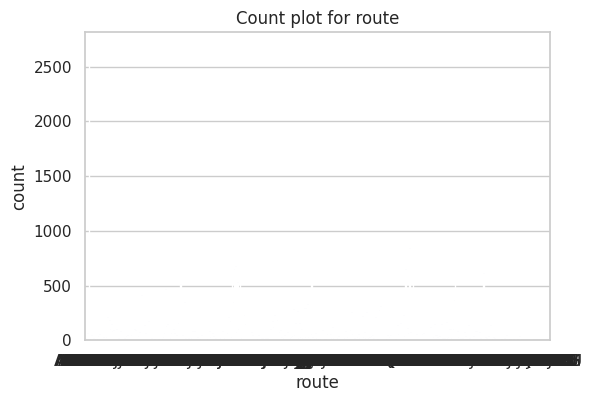

--------------------------------------------------


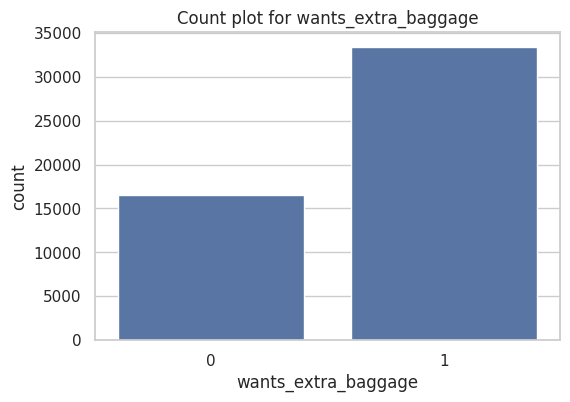

--------------------------------------------------


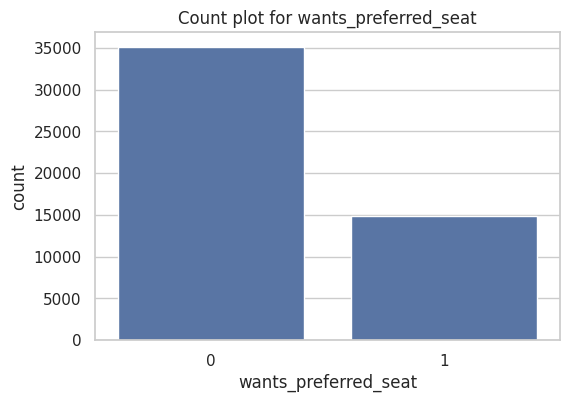

--------------------------------------------------


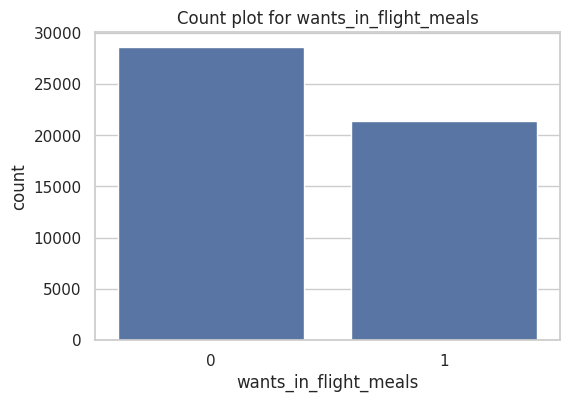

--------------------------------------------------


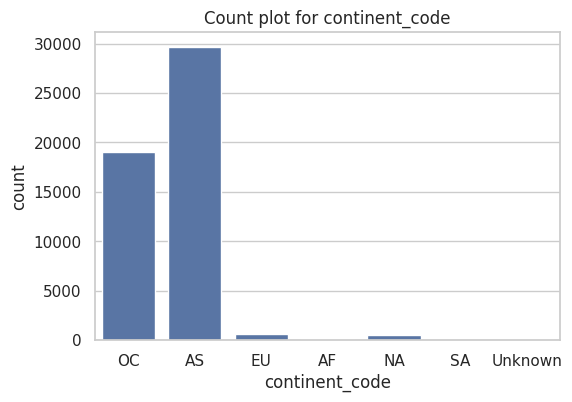

--------------------------------------------------


In [75]:
for col in categorical_features:
  plt.figure(figsize=(6,4))
  sns.countplot(x=df[col])
  plt.title(f'Count plot for {col}')
  plt.show()
  print('-'*50)

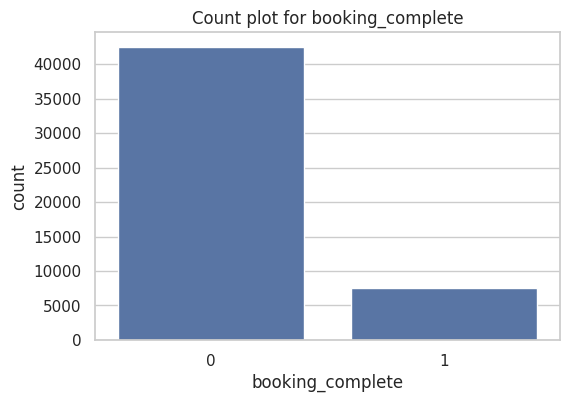

In [54]:
# Count plot for target column 'booking_complete'
plt.figure(figsize=(6,4))
sns.countplot(x=df['booking_complete'])
plt.title(f'Count plot for booking_complete')
plt.show()

**Class imbalance in target column**

In [87]:
df['booking_complete'].value_counts()

,count
booking_complete,
0,42522
1,7478


# **Label Encoding**

In [89]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [84]:
# Finding columns to label encode (Object datatype)
for col in df.columns:
  if df[col].dtype == 'object':
    print(col)

sales_channel
trip_type
route
continent_code


In [86]:
object_columns = ['sales_channel','trip_type','route','continent_code']

In [90]:
encoders = {} # Intialising dictionary to store encoders
for col in object_columns:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder # Save the encoder for this column

  # Save the encoder as a pickle file
  with open('encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [91]:
encoders

{'sales_channel': LabelEncoder(),
 'trip_type': LabelEncoder(),
 'route': LabelEncoder(),
 'continent_code': LabelEncoder()}

In [92]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,continent_code
0,2,0,2,262,19,7,6,0,1,0,0,5,0,4
1,1,0,2,112,20,3,6,0,0,0,0,5,0,4
2,2,0,2,243,22,17,3,0,1,1,0,5,0,1
3,1,0,2,96,31,4,6,0,0,0,1,5,0,4
4,2,0,2,68,22,15,3,0,1,0,1,5,0,1


# **Bivariate analysis**

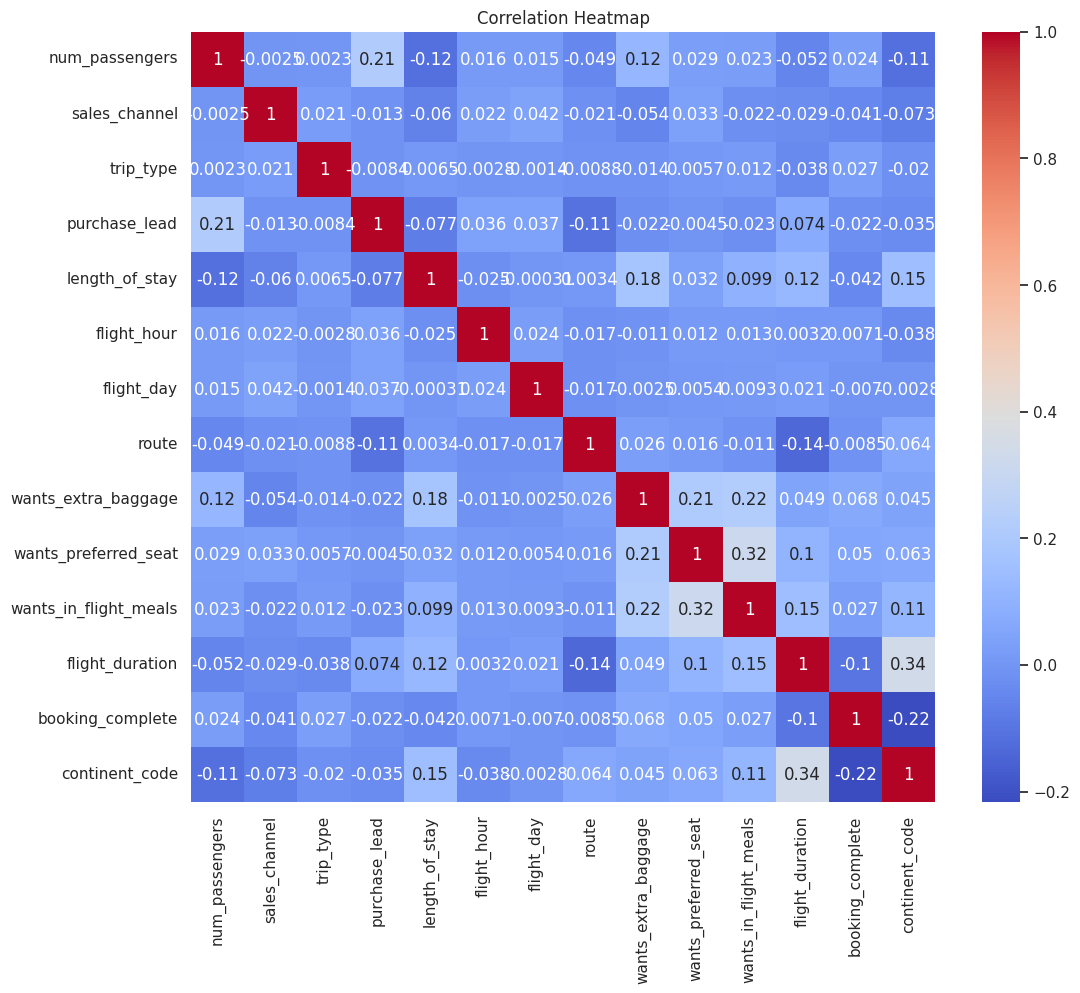

In [93]:
# Create correlation heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Insights from EDA**
- Found outliers in length of stay, purchase lead and number of passengers
- Found class imbalance in Target column
- Found class imbalance in Categorical columns
- Found no highly correlated column
- Performed label encoding

# **Data Preprocessing**

In [94]:
# Handling outliers
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(.25)
  Q3 = df[column].quantile(.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  #replace values with median value
  df[column] = df[column].apply(lambda x: Q3 if x > upper_bound else x)
  return df

In [95]:
numerical_features

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'flight_duration']

In [96]:
# Replace outliers from columns

df = replace_outliers_with_median(df,'num_passengers')

df = replace_outliers_with_median(df,'purchase_lead')

df = replace_outliers_with_median(df,'length_of_stay')


# **Train test split**

In [99]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [102]:
X.shape

(50000, 13)

In [103]:
y.shape

(50000,)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 13)
(10000, 13)
(40000,)
(10000,)


In [108]:
y_train.value_counts()

,count
booking_complete,
0,34002
1,5998


In [109]:
y_test.value_counts()

,count
booking_complete,
0,8520
1,1480


**Using SMOTE to balance the class imbalance**

In [110]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [111]:
print(y_train.shape)

(68004,)


In [113]:
print(y_train.value_counts())

booking_complete
0    34002
1    34002
Name: count, dtype: int64


# **Model training**

In [117]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(random_state=42)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [120]:
# import dependecies
from sklearn.model_selection import cross_val_score

# Cross validation
cross_val_scores = cross_val_score(Random_Forest, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross validation score of Random forest classifier : {cross_val_scores}')

Cross validation score of Random forest classifier : [0.67178884 0.93985736 0.93279906 0.93735755 0.93808824]


In [121]:
print(f'Cross validation score of Random forest classifier : {cross_val_scores.mean():.2f}')

Cross validation score of Random forest classifier : 0.88


# **Hyperparameter tuning**

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [124]:
# Hyperparameter tuning for model
# Perform RandomizedSearchCV

random_search_rf = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [125]:
# Fit the model
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [126]:
print(random_search_rf.best_score_)

0.7860426741978315


In [128]:
random_search_rf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [142]:
# Save the best model
with open('RandomForestClassifier.pkl','wb') as f:
  pickle.dump(random_search_rf.best_estimator_,f)

# **Model Evaluation**

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [143]:
# Load the saved model from pickle file
with open('RandomForestClassifier.pkl', 'rb') as f:
    model = pickle.load(f) # Load the model into a variable named 'model'

# Make predictions on the test data
y_test_pred = model.predict(X_test) # Use the loaded model 'model' for prediction

print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_test_pred))
print('Classification Report:\n',classification_report(y_test, y_test_pred))

Accuracy : 0.6944
Confusion Matrix:
 [[6236 2284]
 [ 772  708]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      8520
           1       0.24      0.48      0.32      1480

    accuracy                           0.69     10000
   macro avg       0.56      0.61      0.56     10000
weighted avg       0.79      0.69      0.73     10000

